In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# ReLu function
def activation_ReLu(value):
    if value > 0:
        return value
    else:
        return 0

# partial derivative of ReLu for the backpropagation
def activation_ReLu_part_deriv(value):
    if value > 0:
        return 1
    else:
        return 0   

In [58]:
# lock down the randomness
#np.random.seed(123)

def generate_test_data():
    result = []

    for x in range(300):
        n1 = np.random.randint(0, 5)
        n2 = np.random.randint(3, 7)
        n3= n1 ** 2 + n2 + np.random.randint(0, 5)
        n3 = int(n3)

        result.append([n1, n2, n3])

    return result

In [59]:
# Initialising weights and biases
# Weights
w1 = 1
w2 = 0.5
w3 = 1
w4 = -0.5
w5 = 1
w6 = 1

# Biases
bias1 = 0.5
bias2 = 0
bias3 = 0.5

# save the original weights and biases for comparison in the end
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3

# input values and target value
#input1 = 1
#input2 = 0
#true_value = 2

# learning rate
LR = 0.0055
epochs = 500

# Using the previously defined function to generate data instead
data = generate_test_data()

# Let's scale our values with min/max -scaling
data=(data - np.min(data))/(np.max(data)-np.min(data))

# Points for plotting loss later
loss_points = []

for epoch in range(epochs):

    epoch_losses = []

    for row in data:
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]
        # Forward pass
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)
        
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)

        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)

        predicted_value = node_3_output
        # This will probably crash if the loss value gets too high
        # replace with Numpy64 if needed
        loss = (predicted_value - true_value) ** 2

        epoch_losses.append(loss)

        # Back propagation - last layer
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5
        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6
        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # Back propagation - next layer
        # From this point the chain rule is needed

        # Weights 1 to 4:
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # Biases 1 and 2:
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # Updating the weights and biases
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    average_loss = sum(epoch_losses) / len(epoch_losses)
    # after each epoch, print the current weights and biases
    loss_points.append(average_loss)
    print(f"Epoch: {epoch +1}, loss = {average_loss}")

    """print(f"W1: {new_w1}")
    print(f"W2: {new_w2}")
    print(f"W3: {new_w3}")
    print(f"W4: {new_w4}")
    print(f"W5: {new_w5}")
    print(f"W6: {new_w6}")
    print(f"B1: {new_b1}")
    print(f"B2: {new_b2}")
    print(f"B3: {new_b3}")"""

Epoch: 1, loss = 0.05883470854364731
Epoch: 2, loss = 0.029062240345845786
Epoch: 3, loss = 0.026726806497678706
Epoch: 4, loss = 0.024485599614725233
Epoch: 5, loss = 0.022364190716451106
Epoch: 6, loss = 0.02036835464108957
Epoch: 7, loss = 0.01852614000349715
Epoch: 8, loss = 0.01684009041499183
Epoch: 9, loss = 0.015322034111473004
Epoch: 10, loss = 0.013966139325246592
Epoch: 11, loss = 0.012786101594225097
Epoch: 12, loss = 0.011765276242180782
Epoch: 13, loss = 0.01088578729520248
Epoch: 14, loss = 0.010123122790439979
Epoch: 15, loss = 0.009471755114022358
Epoch: 16, loss = 0.008914130081271506
Epoch: 17, loss = 0.008413363130444001
Epoch: 18, loss = 0.007980969845669875
Epoch: 19, loss = 0.007616203155535944
Epoch: 20, loss = 0.0073093241357790936
Epoch: 21, loss = 0.007022792170106099
Epoch: 22, loss = 0.006747961576672155
Epoch: 23, loss = 0.0065107545465835056
Epoch: 24, loss = 0.006291556990250886
Epoch: 25, loss = 0.006115007682424793
Epoch: 26, loss = 0.00596275647440180

In [60]:
print("-------------------")
print("Original weights/biases")
print(f"W1: {original_w1}")
print(f"W2: {original_w2}")
print(f"W3: {original_w3}")
print(f"W4: {original_w4}")
print(f"W5: {original_w5}")
print(f"W6: {original_w6}")
print(f"B1: {original_b1}")
print(f"B2: {original_b2}")
print(f"B3: {original_b3}")

print("-------------------")
print("Final weights/biases")
print(f"W1: {w1}")
print(f"W2: {w2}")
print(f"W3: {w3}")
print(f"W4: {w4}")
print(f"W5: {w5}")
print(f"W6: {w6}")
print(f"B1: {bias1}")
print(f"B2: {bias2}")
print(f"B3: {bias3}")

-------------------
Original weights/biases
W1: 1
W2: 0.5
W3: 1
W4: -0.5
W5: 1
W6: 1
B1: 0.5
B2: 0
B3: 0.5
-------------------
Final weights/biases
W1: 1.696005314495832
W2: 2.13700300532797
W3: 0.7245258317764475
W4: 0.0269341906702055
W5: 1.30428725209625
W6: 2.1818549969646344
B1: 0.030994930037807376
B2: -0.19289901797576944
B3: 0.007864906278702073


<function matplotlib.pyplot.show(close=None, block=None)>

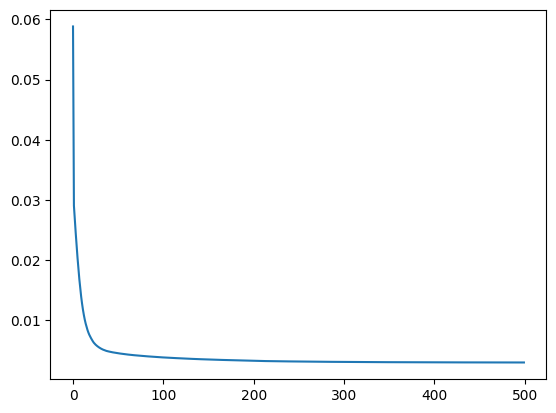

In [61]:
plt.plot(loss_points)
plt.show

In [62]:
# Prediction is just doing the forward pass step
def predict(x1, x2):
    node_1_output = x1 * w1 + x2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)
    
    node_2_output = x1 * w2 + x2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)

    return node_3_output

In [63]:
predict(1, 1)

7.505878613717743